# Breve introducción a ANN

Tutorial basado en el artículo [Simple Introduction to Convolutional Neural Networks](https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac).

Antes de comenzar con el alboratorio vamos a revisar los conceptos básicos de las *redes neuronales artificiales* (ANN por sus siglas en inglés) y como se aplican al procesamiento y análisis de imágenes.

## Motivación: análisis de imagen

En las unidades anteriores hemos estado hablando básicamente de detectar características visuales en imágenes. Los investigadores desarrollaron múltiples técnicas de visión computacional para tratar estos problemas: SIFT, FAST, SURF, BRIEF, ORB, KAZE, etc. Sin embargo, en general estas técnicas presentaban dificultades para ciertos problemas: los detectores son demasiado simples o están diseñados para problemas muy específicos.

Entonces la pregunta que surgió fue bastante obvia: ¿qué pasa si aprendemos las características visual que queremos detectar? Y la respuesta es simple: necesitamos un sistema que pueda hacer *aprendizaje de características* (o Feature Learning).

El aprendizaje de características es una técnica que permite que un sistema encuentre automáticamente características relevantes para una tarea determinada, de manera que permite reemplazar el diseño manual de características. **Redes neuronales artificiales** es una de las técnicas que permite hacer esto.

## Redes Neuronales artificiales

Una **red neural artificial** es un modelo computacional que se inspira en la forma en como las redes neuronales biológicas del cerebro humano procesan la información.



### Una sola neurona

La unidad básica de cálculo en una red neuronal es la *neurona*, a menudo llamada nodo o unidad. Recibe información de algunos otros nodos, o de una fuente externa y calcula una salida. Cada entrada tiene un peso asociado (`w`), que se asigna en función de su importancia relativa a otras entradas. El nodo aplica una función `f` a la suma ponderada de sus entradas como se muestra a continuación:

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=1136&h=606)

La red anterior toma entradas numéricas `X1` y `X2` y tiene pesos `w1` y `w2` asociados con esas entradas. Además, hay otra entrada `1` con el peso `b` (llamado *bias*) asociado a ella, y por el momento vamos a omitir esta entrada.

La salida `Y` de la neurona se calcula como se muestra en la figura. La función `f` se llama *función de activación*. Una función de activación toma un número y realiza una operación matemática determinada. Hay varias funciones de activación que se pueden encontrar en la práctica:

* `Sigmoide`: toma una entrada de valor real y la aplasta para que oscile entre 0 y 1

* `ReLU`: ReLU significa *unidad lineal rectificada*. Toma una entrada de valor real y la umbraliza a cero (reemplaza los valores negativos con cero)

![](https://miro.medium.com/max/1742/1*XxxiA0jJvPrHEJHD4z893g.png)

### Red neuronal feedforward multicapa (MLP)

La red neuronal feedforward fue el primer modelo ideado y a su vez el más simple. Contiene múltiples neuronas (nodos) dispuestas en capas. Los nodos de las capas adyacentes tienen conexiones entre ellos y todas estas conexiones tienen pesos asociados con ellas. Un ejemplo de una red neuronal feedforward se muestra en la figura:

![](https://miro.medium.com/max/1200/1*BQ0SxdqC9Pl_3ZQtd3e45A.png)

Una red neuronal feedforward (multilayer) consta de nodos en tres tipos de capas:

1. *Capa de entrada*: los nodos de esta capa proporcionan información externa a la red. No se realiza ningún cálculo en estos nodo, simplemente transmiten la información a los nodos de la capa oculta.

2. *Capas ocultas*: los nodos de estas capas realizan cálculos y transfieren información de los nodos de entrada a los nodos de salida. Una red feedforward puede tener cero o múltiples capas ocultas.

3. *Capa de salida*: los nodos de salida son responsables de los cálculos y la transferencia de información de la red al mundo exterior.

En una red feedforward, la información se mueve en una sola dirección, hacia adelante, desde los nodos de entrada, a través de los nodos ocultos y hacia los nodos de salida. No hay ciclos ni bucles en la red.

### Entrenando una ANN: algoritmo Backpropagation

El proceso por el cual una ANN aprende se conoce como algoritmo de *backpropagation*, o retropropagación (abreviado como *BackProp*):

* Es un esquema de entrenamiento supervisado, lo que significa que aprende de datos de entrenamiento ya etiquetados.
* En términos simples, BackProp consiste en "aprender de los errores". El algoritmo corrige el ANN cada vez que comete errores.
* El objetivo del aprendizaje es asignar pesos correctos a las conexiones entre nodos de capas diferentes. Dado un vector de entrada, estos pesos determinan cuál es el vector de salida.

#### Algoritmo BackProp

![](https://miro.medium.com/max/600/0*zjTuE91Skw7y2Vx-)
Fuente: https://gfycat.com/gifs/search/backpropagation


Inicialmente, todos los pesos de borde se asignan aleatoriamente. Para cada entrada en el conjunto de datos de entrenamiento, el ANN se activa y se observa su salida. Esta salida se compara con la salida deseada que ya conocemos, y el error se *propaga* de nuevo a la capa anterior. Este error se observa y los pesos se *ajustan* en consecuencia. Este proceso se repite hasta que el error de salida esté por debajo de un umbral predeterminado.

#### Predicción de nuevas entradas

Una vez que termina el algoritmo BackProp, hemos aprendido una ANN, y está lista para trabajar con nuevas entradas. La siguiente figura muestra como fluye la información de una nueva entrada para una red que ya fue entrenada.

![](https://miro.medium.com/max/1111/0*bmcR3nOLvyp1moa6.gif)

Con el fin de mejorar el entendimiento de este proceso, se puede utilizar la web desarrollada por Adam Harley (http://scs.ryerson.ca/~aharley/vis/fc/) para visualizar en 3D una ANN que fue entrenada (usando Backpropagation) para reconocer dígitos escrito a mano sobre la base de datos MNIST.

La red toma 784 valores numéricos de píxeles como entradas de una imagen de 28x28 de un dígito escrito a mano (tiene 784 nodos en la capa de entrada correspondientes a píxeles). La red tiene 300 nodos en la primera capa oculta, 100 nodos en la segunda capa oculta y 10 nodos en la capa de salida (correspondientes a los 10 dígitos).

## Problemas de las ANN tradicionales (MLP)

Antes de empezar con la páctica de ANN para análisis de imágenes, vamos a repasar los problemas que presentan las ANN tradicionales.

* Hay varios inconvenientes con las MLP, especialmente cuando se trata del procesamiento de imágenes. Los MLP usan un perceptrón para cada entrada (por ejemplo, píxel en una imagen, multiplicado por 3 en caso de RGB). La cantidad de pesos rápidamente se vuelve inmanejable para imágenes grandes. Para una imagen de 224x224 píxeles con 3 canales de color, hay alrededor de 150.000 pesos que deben entrenarse. Como resultado, surgen dificultades durante el entranamiento, como ser el *sobreajuste*.

* Otro problema común es que los MLP reaccionan de manera diferente a una entrada (imágenes) y su versión desplazada: no son invariantes de traslación. Por ejemplo, si aparece una imagen de un gato en la parte superior izquierda de una imagen y otro en la parte inferior derecha de otra imagen, el MLP intentará corregirse y asumirá que siempre aparecerá un gato en esa sección de la imagen.

Ahora si, ya podemos comenzar con la práctica de este laboratorio.

# Clasificación con ANN: predecir la clase de una imagen

Tutorial extraído de https://www.tensorflow.org/tutorials/keras/classification

En esta primera parte del laboratorio vamos entrenar una red neuronal para clasificar imagenes de ropa como ser zapatos, vestidos, camisetas y más. No hay problema sino entienden todos los detalles, ya que es una mirada rápido sobre un programa completo de *Tensorflow* con los detalles explicados a medida que se avanza.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel para construir y entrenar modelos de redes neuronales en Tensorflow.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene más de 70000 imágenes en 10 categorias. Las imágenes muestran artículos individuales de ropa a una resolución muy baja (28 por 28 pixeles), tal como se ve aca:

<table>
  <tr><td>
    <img src="https://miro.medium.com/max/1400/1*RkysnlFejHNE4Us5aXmnHQ.jpeg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

En este lab vamos a usar 60.000 imágenes para entrenar la red neuronal y 10.000 para evaluar que tan exacto aprendió la red a clasificar imágenes de moda. Se puede acceder al dataset Fashion MNIST directamente desde TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Al cargar el dataset, la función retorna cuatro arreglos en `NumPy`:

* Los arreglos `train_images` y `train_labels` son los datos del *training set* que se usan para aprender el modelo.
* Los arreglos `test_images` y `test_labels` son los datos del *test set* que se usan para probar el modelo.

Las imágenes se cargan como arreglos `NumPy` de 28x28, con valores de pixel que varian de 0 a 255 (imagen en escala de grises). Los arreglos *labels* son arreglos de enteros, que van del 0 al 9, con tantas filas como imágenes hay para entrenamiento y para testeo, respectivamente. Estos corresponden a la *clase* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los nombres de las clases no estan incluídos en los arreglos *labels*, los almacenamos acá para usarlos luego cuando se visualicen las imágenes:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Crear un diccionario que asocie los números de clases con los nombres de clases
class_dictionary = {i: class_names[i] for i in range(len(class_names))}

In [ ]:
class_dictionary

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

## Explorar el set de datos

Exploramos el la información del dataset antes de entrenar el modelo. Lo siguiente muestra que hay 60.000 imágenes en el set de entrenamiento con cada imagen representada por un arrelgo de 28x28 píxeles:

In [ ]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60.000 etiquetas en el set de entrenamiento:

In [ ]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10.000 imágenes en el set de pruebas. Otra vez, cada imagen es representada por un arrelgo de 28x28 píxeles:

In [ ]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10.000 etiquetas de imagen:

In [ ]:
len(test_labels)

10000

## Pre-procesar el dataset

El set de datos debe ser pre-procesado antes de entrenar la red. Al visualizar la primera imagen en el set de entrenamiento, encontramos que los valores de los pixeles están entre 0 y 255:

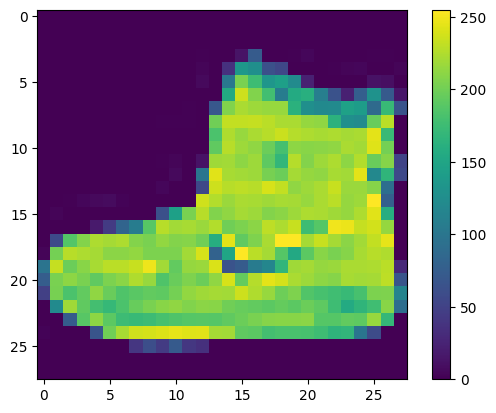

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de entrenar la red neuronal debemos escalar estos valores en un rango de 0 a 1. Para hacero, dividimos los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que el set de datos está en el formato adecuado y que están listos para entrenar la red, veamos las primeras 25 imágenes de el *training set* junto al nombre de clase debajo de cada imagen.

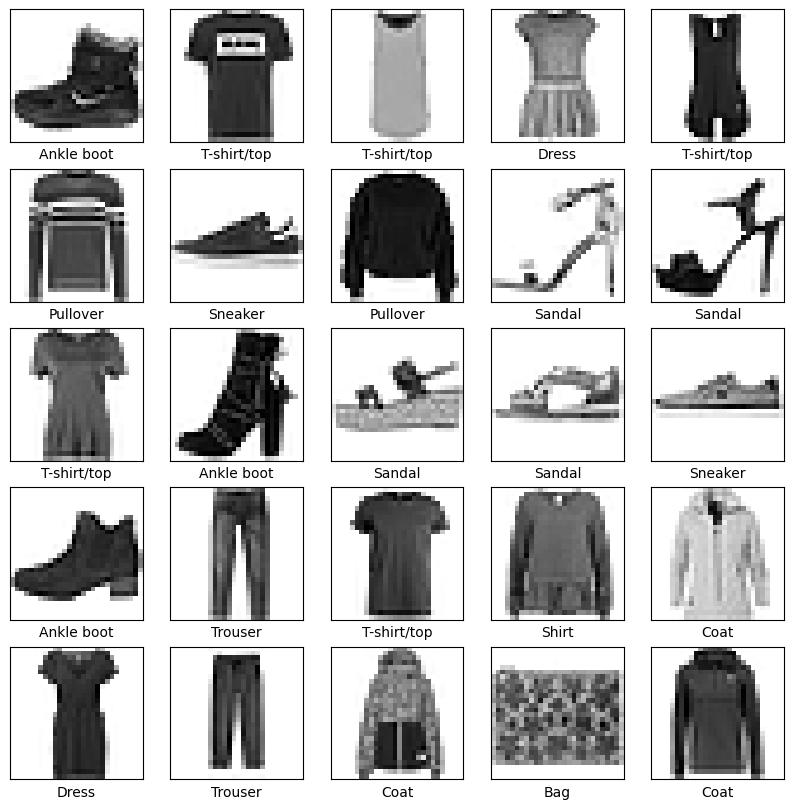

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir del Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilarlo.

### Configurar las Capas

Los bloques de construcción básicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones (características o features) del set de datos con el que se alimentan.

La mayor parte del *aprendizaje profundo* (deep learning) consiste en encadenar capas simples. La mayoría de las capas tienen parámetros que son aprendidos durante el entrenamiento. En TensorFlow, estas capas son implementadas mediante `tf.keras.layers.Dense`.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`,
transforma las imágenes de un arreglo bi-dimensional (de 28x28 píxeles) a un arreglo uni-dimensional (de 28\*28 píxeles = 784 píxeles). En esta capa no hay parámetros que aprender, solo se *reformatea* el set de datos.

Despues de que los píxeles son "aplanados", el modelo consiste de una secuencia de dos capas `tf.keras.layers.Dense`. Estas están densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas) con una *función de activación* del tipo *relu*. La segunda (y última) capa es una capa de 10 nodos on una *función de activación* de tipo *softmax*, que devuelve un arreglo de 10 probabilidades que suman 1. Cada nodo contiene una *calificación* que indica la probabilidad de que la imagen actual pertenezca a una de las 10 clases.

### Compilar el modelo

Antes de que el modelo este listo para ser entrenado, se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function*: esto permite medir que tan exacto es el modelo durante el entrenamiento. La idea es minimizar el valor de esta función para "dirigir" el modelo en la direccion adecuada.
* *Optimizer*: así es como se actualiza el modelo basado en los datos de entrenamiento y su loss function.
* *Metrics*: se usan para monitorear los pasos de entrenamiento y de testeo. El siguiente ejemplo usa *accuracy* (exactitud), es decir, la fracción de imágenes que son correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar la red neuronal requiere de los siguientes pasos:

1. Entregar los datos de entrenamiento al modelo. En este ejemplo, el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. Correr el entreanamiento para que el modelo aprenda a asociar imágenes con etiquetas.
3. Pedir al modelo que haga predicciones sobre un set de datos de pruebas, incluido en el arreglo `test_images`. Verificar que las predicciones sean iguales a las etiquetas del arreglo `test_labels`.

Para comenzar a entrenar, se llama el método `model.fit`. Se denomina así por que ajusta (*fit*) el modelo a el set de datos de entrenamiento:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.4962 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3751 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

A medida que el modelo entrena, la muestran los valores de *loss function* y *accuracy* sobre el **set de datos de entrenamiento**.

En este punto vale aclarar terminología de redes neuronales, y que son parámetros del método `fit`:

* Un `epoch`: un pase hacia adelante (*forward pass*) y un pase hacia atrás (*backward pass*) de **todos los ejemplos de entrenamiento**.
* `batch size`: número de ejemplos de entrenamiento en un forward/backward pass. Cuanto mayor sea el tamaño del lote, más espacio en memoria se necesita.
* Número de `iteraciones` = número de pasadas, donde el número de ejemplos de involucrados en cada pasada esta especificado por `[batch size]`. Una pasada es un *forward pass* mas un *backward pass*.

Ejemplo: si se tiene 1.000 ejemplos de entrenamiento y el `batch size` es de 500, entonces se necesitan 2 iteraciones para completar 1 `epoch`.

## Evaluar Accuracy

A continuación vamos a estimar el rendimiento del modelo sobre el set de datos de prueba:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3391 - accuracy: 0.8851 - 715ms/epoch - 2ms/step

Test accuracy: 0.8851000070571899


Resulta que la *accuracy* sobre el set de datos de pruebas es un poco menor que la *accuracy* sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe al *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo (o de testeo), que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

Finalmente, con el modelo entrenado ya se pueden hacer predicciones sobre nuevas imágenes. Para esto usamos el método `predict` con las imágenes del conjunto de testeo.

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


En la celda anterior, el modelo predice la etiqueta para cada imagen en el set de datos de prueba. Miremos la primera prediccion:

In [ ]:
predictions[0]

array([6.1024656e-07, 8.6466017e-09, 6.2135919e-09, 2.0039890e-09,
       2.7431502e-08, 5.5131450e-04, 2.5158224e-07, 4.0797569e-02,
       4.6133703e-08, 9.5865017e-01], dtype=float32)

Una prediccion es un arreglo de 10 números (que corresponden a las 10 neuronas de la segunda capa). Estos valores representan el nivel de "confianza" (o probabilidad) que el modelo arroja sobre las imágenes de cada uno de los 10 artículos de moda/ropa. Se puede revisar cual tiene el nivel más alto de confianza:

In [ ]:
pred_label = np.argmax(predictions[0])
print(pred_label, " [", class_names[pred_label], "]", sep="")

9 [Ankle boot]


De esta manera, el modelo tiene mayor confianza que esta imagen es una "ankle boot". Examinando las etiquetas del set de datos de pruebas, podemos ver que esta clasificaion es correcta:

In [ ]:
test_labels[0]

9

Por último vamos crear una función que nos permita graficar la probabilidad de clase de cada una de las imagenes del dataset de pruebas.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Tomemos como ejemplos la primer imagen del conjunto de testeo (`i=0`) y la décimotercera (`i=12`). Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje para la etiqueta predicha.

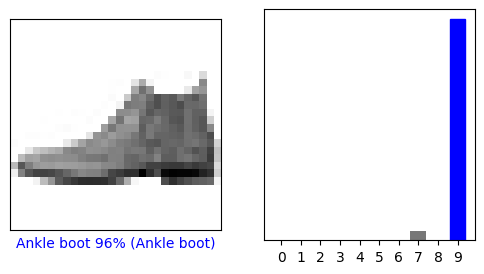

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

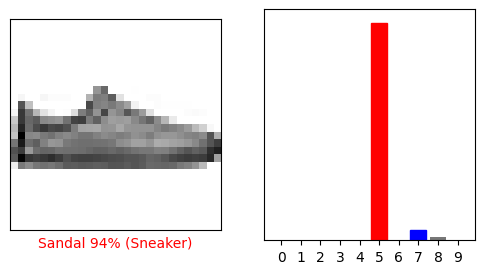

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora vamos a graficar multiples imágenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

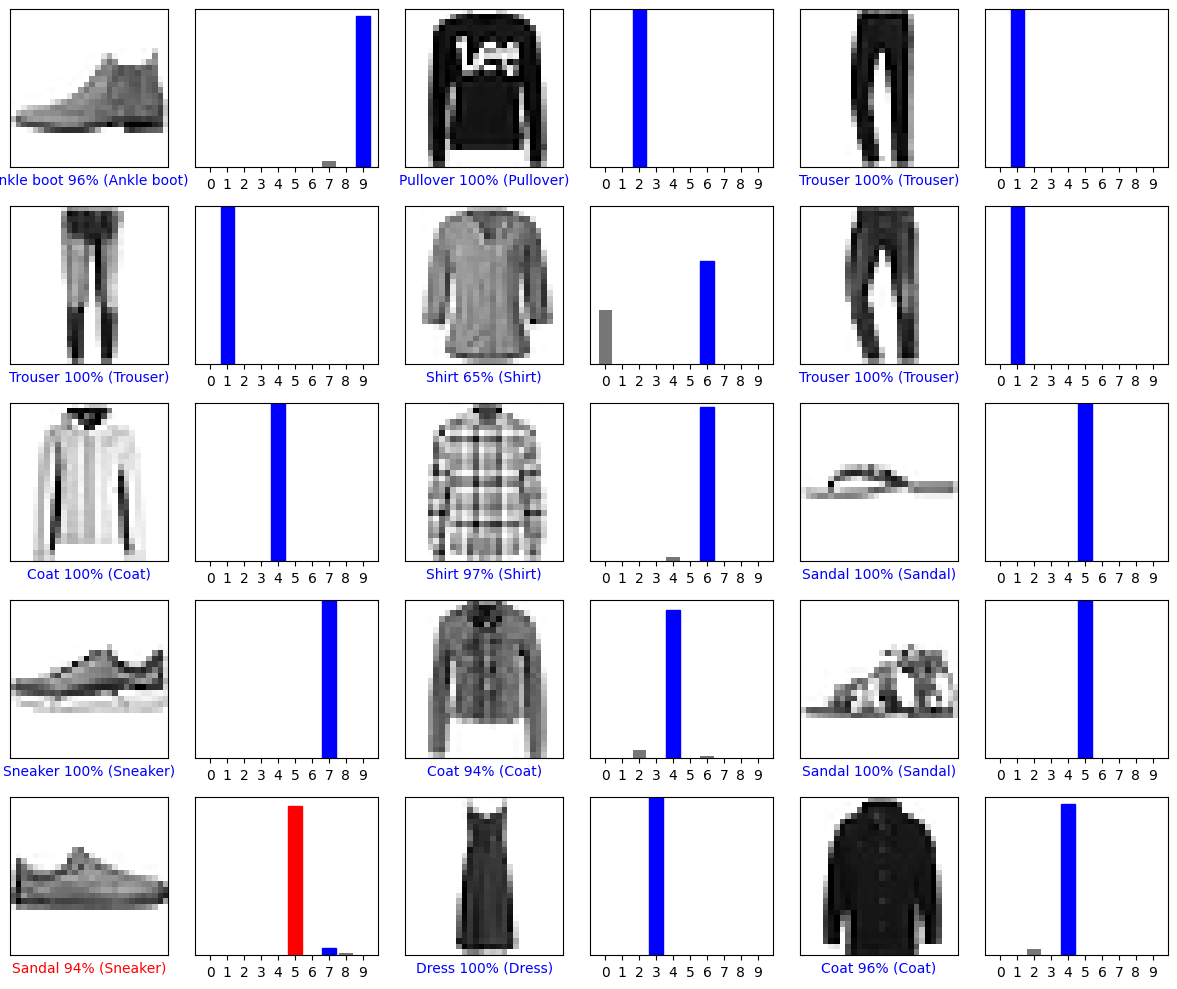

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una predicción sobre una única imagen.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` se optimizan para hacer predicciones en un lote de ejemplos a la vez. En consecuencia, a pesar de que está utilizando una sola imagen, es necesario añadirla a una lista:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora se puede predecir la etiqueta correcta para esta única imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[5.3673716e-06 3.1789543e-14 9.9919027e-01 3.4123690e-10 5.8401650e-04
  1.4243718e-13 2.2034519e-04 3.5204511e-23 4.1447792e-10 1.3867223e-19]]


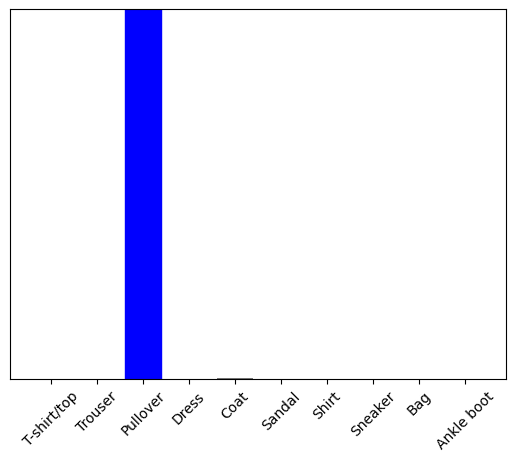

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del lote de imáágenes. Por lo tanto, para tomar la prediccion de la única imagen dentro del lote hacemos:

In [ ]:
pred_label_single = np.argmax(predictions_single[0])
print(pred_label_single, " [", class_names[pred_label_single], "]", sep="")

2 [Pullover]


Y el modelo predice la etiqueta 2 (pullover).

---

# Trabajo Práctico 1 (primera parte)

**Acá tienen que dejar los datos de las y los integrantes del grupo:**

Nombre y Apellido, DNI, correo eletrónico

Sofia Risso, 39967928, srisso@mi.unc.edu.ar

Damián Prámparo, 40682001, damian.pramparo@mi.unc.edu.ar

Gabriela Gastelu, 38106135, ggastelu@unc.edu.ar

## **EJERCICIO 1.1**: predecir nuevas imágenes de moda con el modelo previamente entrenado



###**Nuevo dataset**

####1. **Crear un nuevo dataset**

Crear un nuevo dataset propio con **30 imágenes** en total (3 imágenes de cada categoría). Estás imágenes no deben ser tomadas del dataset original (Fashion MNIST). Pueden capturar sus propias imágenes o buscarlas en la web. **Como sea, recuerden que deben preprocesar las imágenes para que tengan exactamente el mismo formato de entrada que requiere la red.**



In [ ]:
# EJERCICIO 1.1
# ...

Decidimos tomar las imágenes desde Google. Las guardamos en una carpeta de Google Drive y las importamos directamente desde ahí de manera que tome como etiquetas los nombres de las carpetas.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from google.colab import drive
import cv2
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/DiploDatos2023/Vision/Imagenes'

datagen = ImageDataGenerator(rescale=1.0/255.0)

batch_size = 32
image_size = (28, 28)
class_mode = 'categorical'

data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    seed=42
)



Found 30 images belonging to 10 classes.


In [ ]:
images, labels = next(data_generator)


In [ ]:
# Convierte las imágenes a escala de grises
gray = np.array([cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY) for image in images])

# Invierte los valores de los píxeles para obtener el negativo
inverted_gray_images = 255 - gray

In [ ]:
inverted_gray_images_norm = inverted_gray_images / 255.0


####2. **Mostrar todas las imágenes del conjunto de testeo**
creado por ustedes para que se pueda inspeccionar rápidamente su contenido.


In [ ]:
class_name_propio = data_generator.class_indices

# Imprimir la lista de clases
print("Clases disponibles:")
for class_name, class_id in class_name_propio.items():
    print(f"{class_name}: {class_id}")

Clases disponibles:
Ankle boot: 0
Bag: 1
Coat: 2
Dress: 3
Pullover: 4
Sandal: 5
Shirt: 6
Sneaker: 7
T-shirt top: 8
Trouser: 9


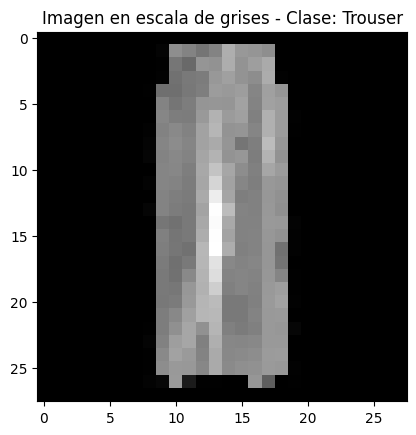

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Elije un índice de imagen en el lote (por ejemplo, 0 para la primera imagen)
image_index = 0
# Obtiene el índice de la clase correspondiente
class_index = np.argmax(labels[image_index])  # Índice de la clase

# Busca el nombre de la clase correspondiente
class_name_1 = list(data_generator.class_indices.keys())[class_index]

# Muestra la imagen y el nombre de la clase
plt.imshow(images[image_index])
plt.title(f'Clase: {class_name_1}')

# Muestra la imagen en escala de grises
grayscale_image = inverted_gray_images[image_index]
plt.imshow(inverted_gray_images[image_index], cmap='gray')
plt.title(f'Imagen en escala de grises - Clase: {class_name_1}')

plt.show()

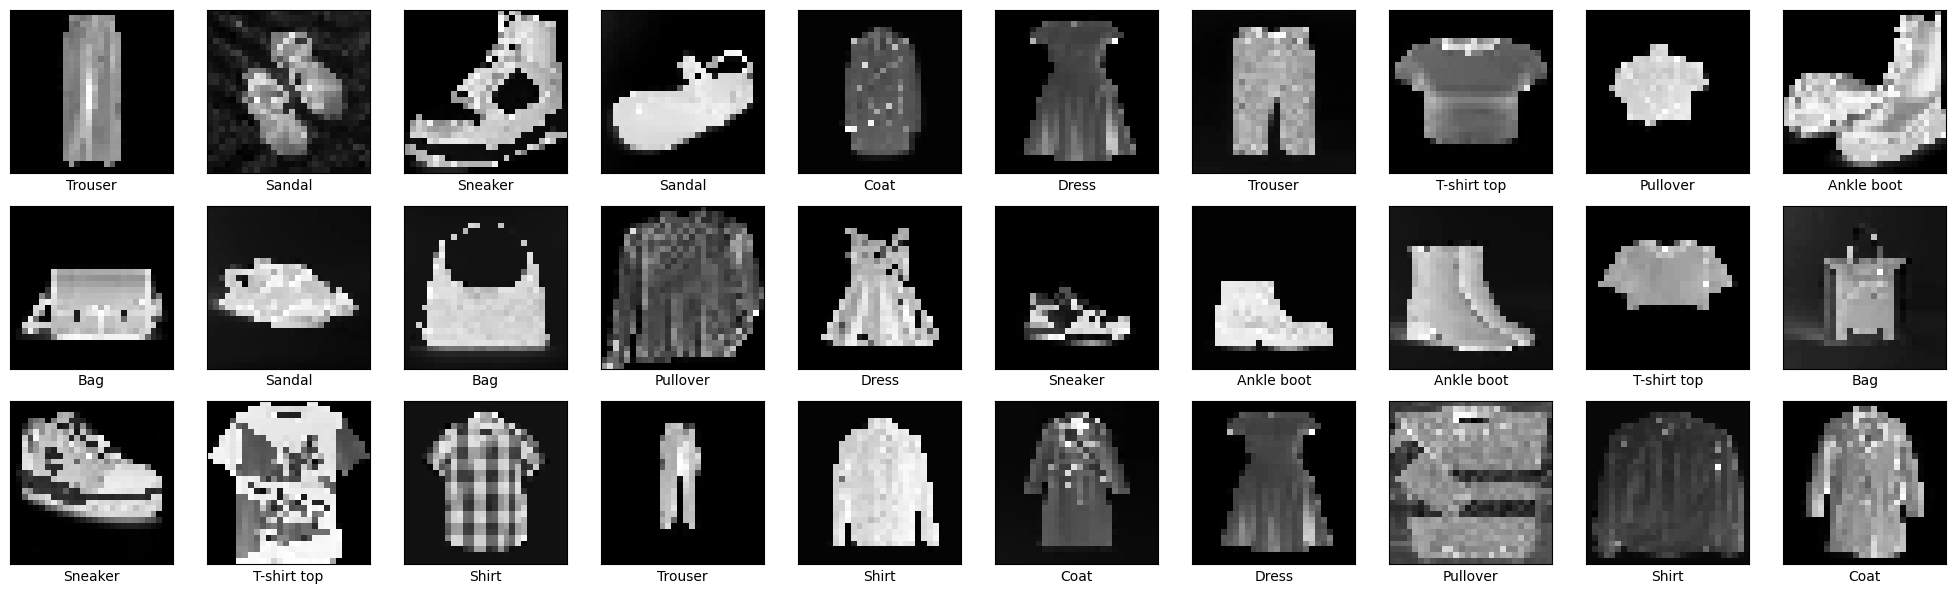

In [ ]:
## 1.2
plt.figure(figsize=(25,25))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(inverted_gray_images[i], cmap='gray')
    class_index = np.argmax(labels[i])
    class_name_1 = list(data_generator.class_indices.keys())[class_index]
    plt.xlabel(class_name_1)
plt.show()


####3. **Predecir las etiquetas**

Tomando la ANN previamente entrenada, **predecir las etiquetas** de cada imagen del dataset y reportar los resultados de **accuracy** (y **opcionalmente** cualquier otra métrica que le resulte adecuada, como ser **precisión** y **recall**)

In [ ]:
## 1.3
predictions = model.predict(inverted_gray_images_norm)

1/1 [==============================] - 0s 26ms/step


In [ ]:
for i in range(30):
    class_index = np.argmax(labels[i])
    class_name = list(data_generator.class_indices.keys())[class_index]
    pred_label = np.argmax(predictions[i])
    pred_category_name = class_dictionary[pred_label]
    print("Clase correcta:", class_name,
          "Predicha:", pred_label, f"({pred_category_name})")

Clase correcta: Trouser Predicha: 3 (Dress)
Clase correcta: Sandal Predicha: 8 (Bag)
Clase correcta: Sneaker Predicha: 7 (Sneaker)
Clase correcta: Sandal Predicha: 5 (Sandal)
Clase correcta: Coat Predicha: 3 (Dress)
Clase correcta: Dress Predicha: 3 (Dress)
Clase correcta: Trouser Predicha: 8 (Bag)
Clase correcta: T-shirt top Predicha: 6 (Shirt)
Clase correcta: Pullover Predicha: 8 (Bag)
Clase correcta: Ankle boot Predicha: 7 (Sneaker)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Sandal Predicha: 8 (Bag)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Pullover Predicha: 6 (Shirt)
Clase correcta: Dress Predicha: 8 (Bag)
Clase correcta: Sneaker Predicha: 5 (Sandal)
Clase correcta: Ankle boot Predicha: 5 (Sandal)
Clase correcta: Ankle boot Predicha: 8 (Bag)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Sneaker Predicha: 8 (Bag)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: Shirt Predicha: 

#####**Accuracy**

Debido a que la numeración de las clases es distinta en el dataset de fashion mnist que el dataset creado por nosotros, es necesario hacer una transformación de los números de las clases para que coincidan y poder calcular métricas.

In [ ]:
#Clases del nuevo dataset
for class_name, class_id in class_name_propio.items():
    print(f"{class_name}: {class_id}")

Ankle boot: 0
Bag: 1
Coat: 2
Dress: 3
Pullover: 4
Sandal: 5
Shirt: 6
Sneaker: 7
T-shirt top: 8
Trouser: 9


In [ ]:
#Clases Fashion Mnist
class_dictionary

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [ ]:
class_indices = np.argmax(labels, axis=1)
class_indices

array([9, 5, 7, 5, 2, 3, 9, 8, 4, 0, 1, 5, 1, 4, 3, 7, 0, 0, 8, 1, 7, 8,
       6, 9, 6, 2, 3, 4, 6, 2])

In [ ]:
#Sustitución de nuestras etiquetas con índices corregidos, respetando el de Fashion Mnist
sustituciones = {0: 9, 1: 8, 2: 4, 3: 3, 4: 2, 5: 5, 6: 6, 7: 7, 8: 0, 9: 1}

class_indices_correc = []

# Recorre la lista y aplica las sustituciones en la nueva lista
for valor in class_indices:
    if valor in sustituciones:
        nuevo_valor = sustituciones[valor]
        class_indices_correc.append(nuevo_valor)
    else:
        class_indices_correc.append(valor)

print("Indices propios:", class_indices)
print("Indices corregidos:", class_indices_correc)

Indices propios: [9 5 7 5 2 3 9 8 4 0 1 5 1 4 3 7 0 0 8 1 7 8 6 9 6 2 3 4 6 2]
Indices corregidos: [1, 5, 7, 5, 4, 3, 1, 0, 2, 9, 8, 5, 8, 2, 3, 7, 9, 9, 0, 8, 7, 0, 6, 1, 6, 4, 3, 2, 6, 4]


In [ ]:
loss, accuracy = model.evaluate(inverted_gray_images_norm, np.array(class_indices_correc))
print("Accuracy:", accuracy)

1/1 [==============================] - 1s 529ms/step - loss: 4.8455 - accuracy: 0.3333
Accuracy: 0.3333333432674408


##### **Imágenes y sus predicciones**

Se muestran en azul las predicciones correctas y en rojo las incorrectas.

In [ ]:
def plot_image_2(i, predictions_array, class_indices_correc, img):
  predictions_array, true_label, img = predictions_array, class_indices_correc[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == class_indices_correc:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[class_indices_correc]),
                                color=color)

def plot_value_array(i, predictions_array, class_indices_correc):
  predictions_array, class_indices_correc = predictions_array, class_indices_correc[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[class_indices_correc].set_color('blue')

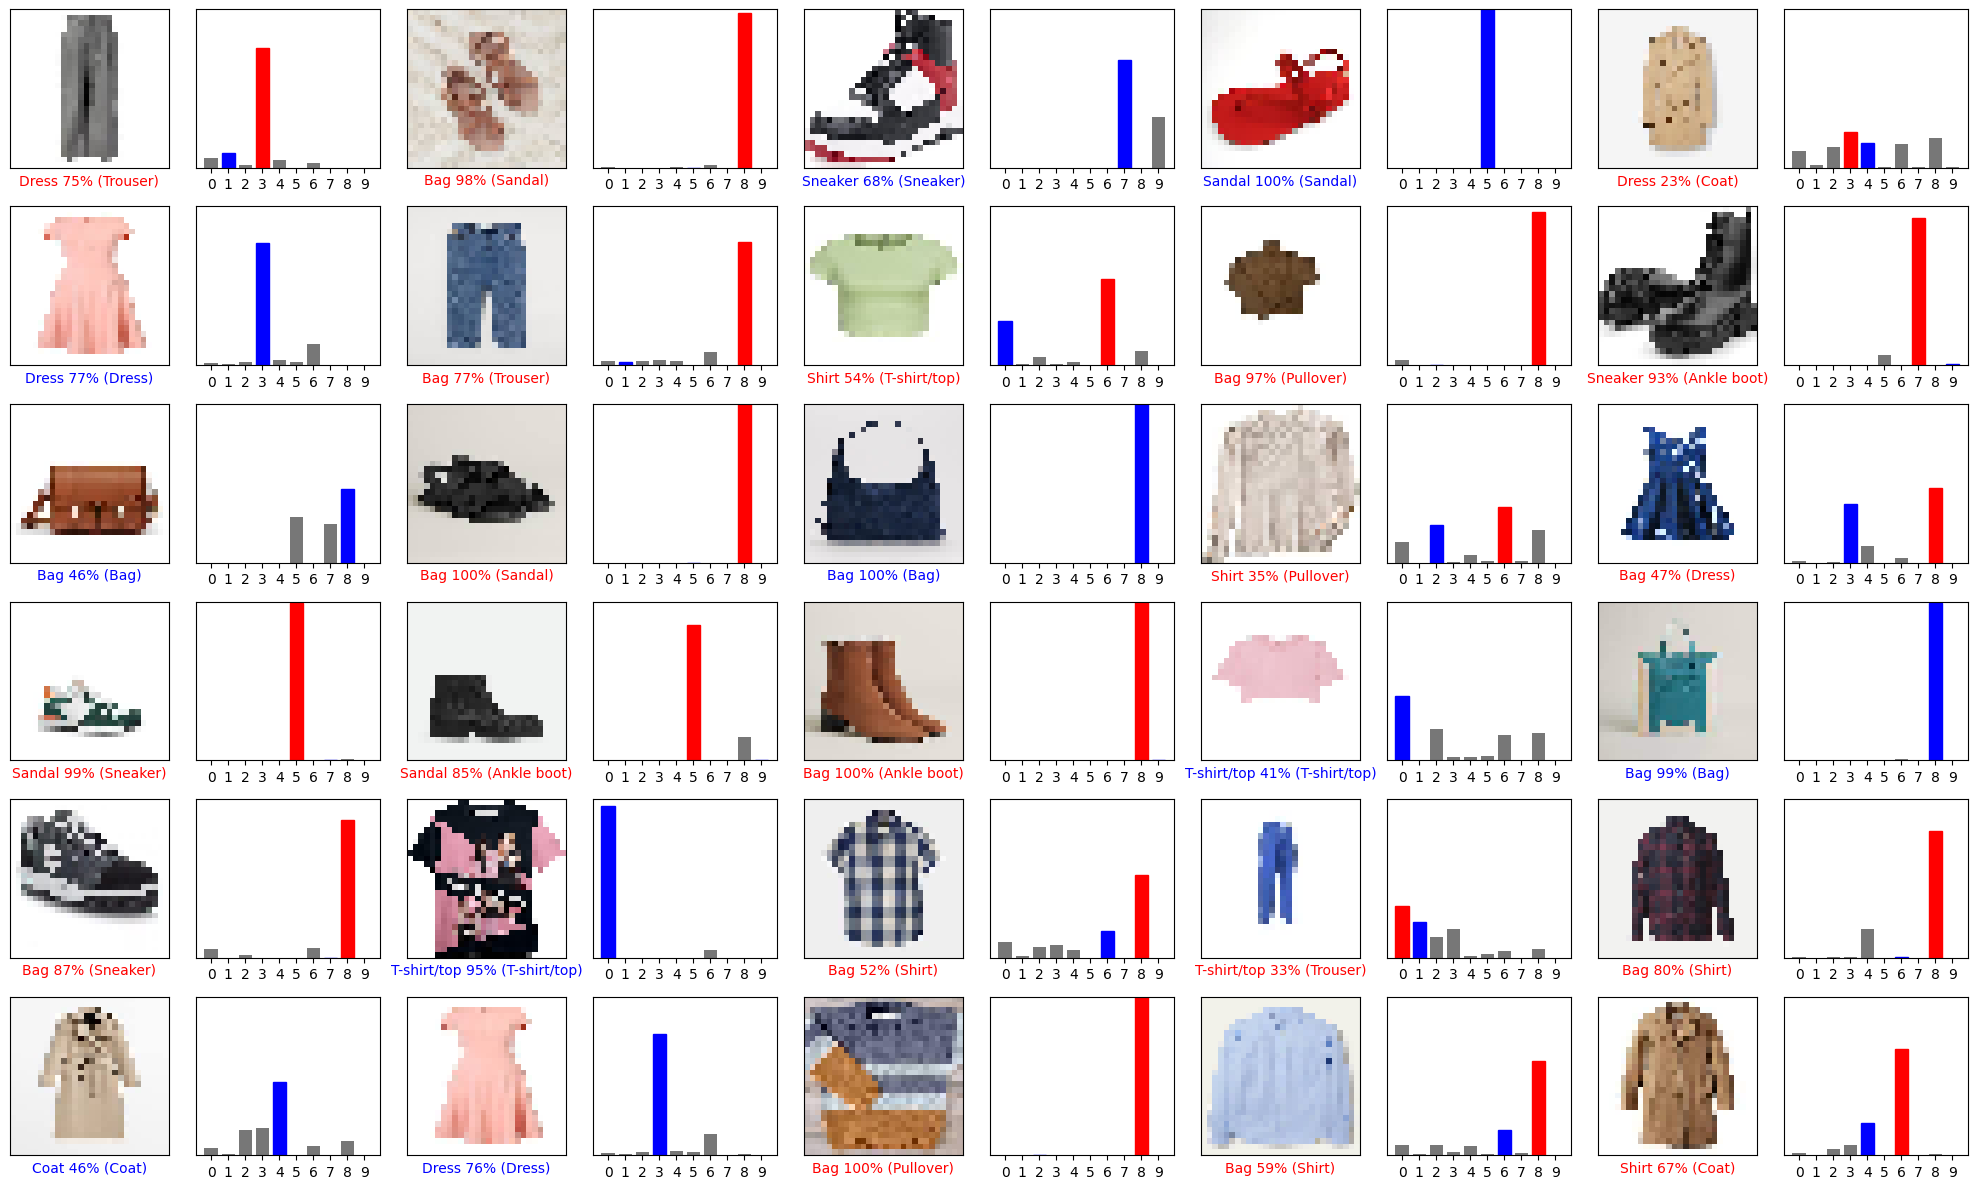

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], class_indices_correc, images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], class_indices_correc)
plt.tight_layout()
plt.show()

###**Imagenes editadas**

Se editaron las imágenes quitando todos los bordes de las prendas y orientando el calzado hacia la izquierda.

#### **Importación del nuevo dataset**

In [ ]:
data_dir_ed = '/content/drive/MyDrive/DiploDatos2023/Vision/ImagenesEd'

datagen_ed = ImageDataGenerator(rescale=1.0/255.0)

batch_size = 32
image_size = (28, 28)
class_mode = 'categorical'

data_generator_ed = datagen_ed.flow_from_directory(
    data_dir_ed,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    seed=42
)



Found 30 images belonging to 10 classes.


In [ ]:
images_ed, labels_ed = next(data_generator_ed)


In [ ]:
# Convierte las imágenes a escala de grises
gray_ed = np.array([cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY) for image in images_ed])

# Invierte los valores de los píxeles para obtener el negativo
inverted_gray_images_ed = 255 - gray_ed

inverted_gray_images_norm_ed = inverted_gray_images_ed / 255.0

#### **Muestra de clases y de imágenes del dataset**

In [ ]:
classes_ed = data_generator_ed.class_indices

# Imprimir la lista de clases
print("Clases disponibles:")
for class_name, class_id in classes_ed.items():
    print(f"{class_name}: {class_id}")

Clases disponibles:
Ankle boot: 0
Bag: 1
Coat: 2
Dress: 3
Pullover: 4
Sandal: 5
Shirt: 6
Sneaker: 7
T-shirt top: 8
Trouser: 9


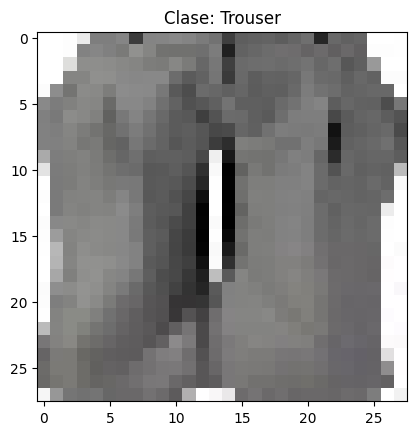

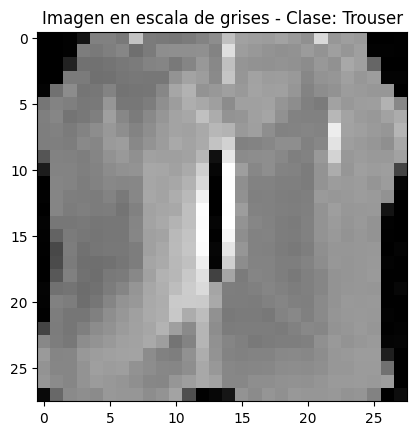

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Elije un índice de imagen en el lote (por ejemplo, 0 para la primera imagen)
image_index = 0

# Obtiene el índice de la clase correspondiente
class_index_ed = np.argmax(labels_ed[image_index])  # Índice de la clase

# Busca el nombre de la clase correspondiente
class_name_ed = list(data_generator_ed.class_indices.keys())[class_index_ed]

# Muestra la imagen y el nombre de la clase
plt.imshow(images_ed[image_index])
plt.title(f'Clase: {class_name_ed}')

# Muestra la imagen en escala de grises
plt.figure()
plt.imshow(inverted_gray_images_norm_ed[image_index], cmap='gray')
plt.title(f'Imagen en escala de grises - Clase: {class_name_ed}')

plt.show()

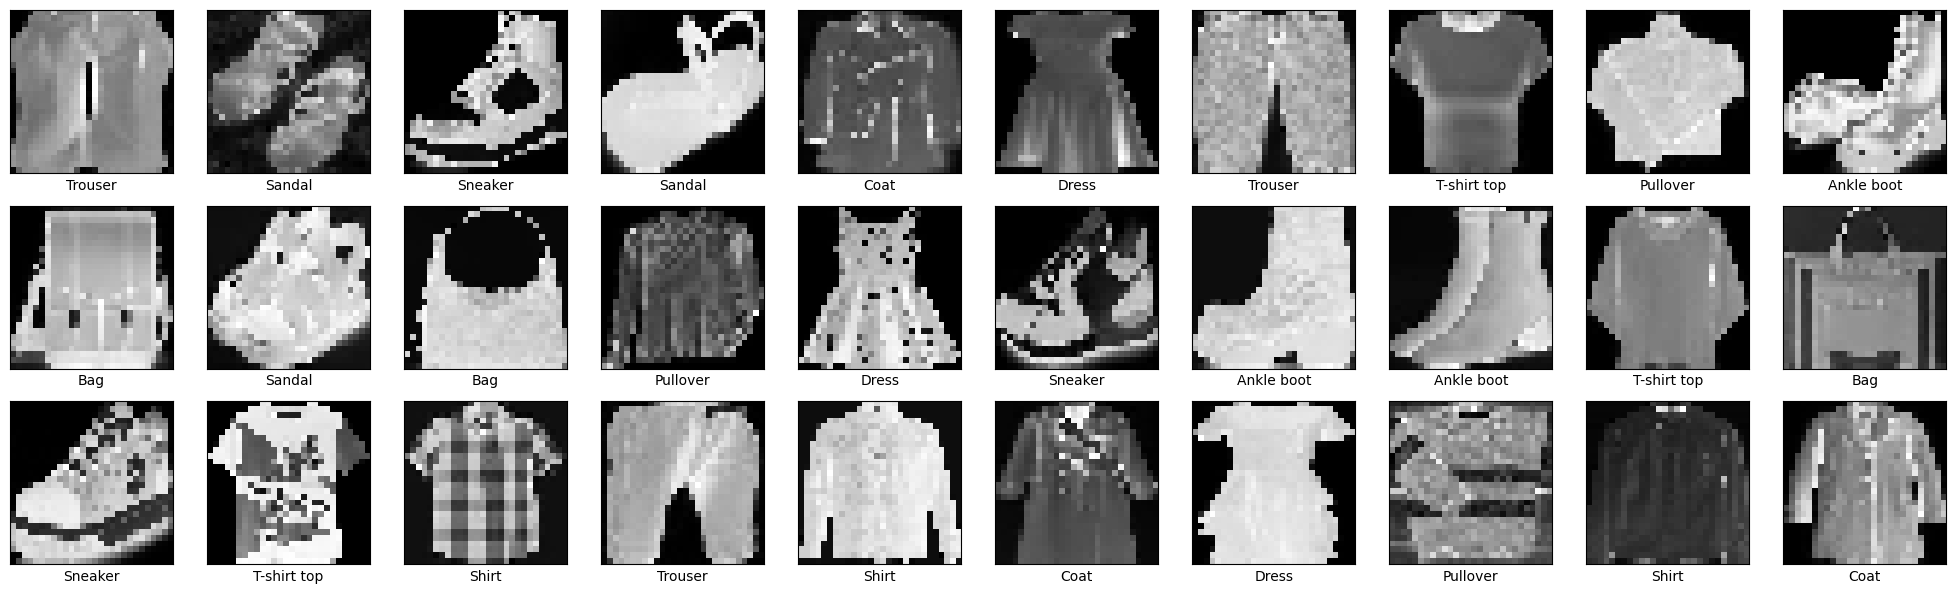

In [ ]:
## 1.2
plt.figure(figsize=(25,25))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(inverted_gray_images_norm_ed[i], cmap='gray')
    class_index_ed = np.argmax(labels_ed[i])
    class_name_ed = list(data_generator_ed.class_indices.keys())[class_index_ed]
    plt.xlabel(class_name_ed)
plt.show()

####**Predicción de etiquetas**

In [ ]:
## 1.3
predictions_ed = model.predict(inverted_gray_images_norm_ed)

1/1 [==============================] - 0s 20ms/step


In [ ]:
for i in range(30):
    class_index_ed = np.argmax(labels_ed[i])
    class_name_ed = list(data_generator_ed.class_indices.keys())[class_index_ed]
    pred_label_ed = np.argmax(predictions_ed[i])
    pred_category_name_ed = class_dictionary[pred_label_ed]
    print("Clase correcta:", class_name_ed,
          "Predicha:", pred_label_ed, f"({pred_category_name_ed})")


Clase correcta: Trouser Predicha: 8 (Bag)
Clase correcta: Sandal Predicha: 8 (Bag)
Clase correcta: Sneaker Predicha: 7 (Sneaker)
Clase correcta: Sandal Predicha: 8 (Bag)
Clase correcta: Coat Predicha: 8 (Bag)
Clase correcta: Dress Predicha: 3 (Dress)
Clase correcta: Trouser Predicha: 8 (Bag)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: Pullover Predicha: 8 (Bag)
Clase correcta: Ankle boot Predicha: 5 (Sandal)
Clase correcta: Bag Predicha: 6 (Shirt)
Clase correcta: Sandal Predicha: 8 (Bag)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Pullover Predicha: 6 (Shirt)
Clase correcta: Dress Predicha: 3 (Dress)
Clase correcta: Sneaker Predicha: 5 (Sandal)
Clase correcta: Ankle boot Predicha: 9 (Ankle boot)
Clase correcta: Ankle boot Predicha: 9 (Ankle boot)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Sneaker Predicha: 5 (Sandal)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: 

Como se puede ver en la celda anterior, todo se etiquetó como Shirt. Esto se debe a la deformación de las imágenes debido a que tenían una proporción muy distinta a 1:1. Por lo tanto, el accuracy disminuyó, en lugar de mejorar.

##### Accuracy

In [ ]:
class_indices_ed = np.argmax(labels_ed, axis=1)
class_indices_ed

array([9, 5, 7, 5, 2, 3, 9, 8, 4, 0, 1, 5, 1, 4, 3, 7, 0, 0, 8, 1, 7, 8,
       6, 9, 6, 2, 3, 4, 6, 2])

In [ ]:
#Sustitución de nuestras etiquetas con índices corregidos, respetando el de Fashion Mnist
sustituciones = {0: 9, 1: 8, 2: 4, 3: 3, 4: 2, 5: 5, 6: 6, 7: 7, 8: 0, 9: 1}

class_indices_correc_ed = []

# Recorre la lista y aplica las sustituciones en la nueva lista
for valor in class_indices_ed:
    if valor in sustituciones:
        nuevo_valor = sustituciones[valor]
        class_indices_correc_ed.append(nuevo_valor)
    else:
        class_indices_correc_ed.append(valor)

print("Indices propios:", class_indices_ed)
print("Indices corregidos:", class_indices_correc_ed)

Indices propios: [9 5 7 5 2 3 9 8 4 0 1 5 1 4 3 7 0 0 8 1 7 8 6 9 6 2 3 4 6 2]
Indices corregidos: [1, 5, 7, 5, 4, 3, 1, 0, 2, 9, 8, 5, 8, 2, 3, 7, 9, 9, 0, 8, 7, 0, 6, 1, 6, 4, 3, 2, 6, 4]


In [ ]:
loss_ed, accuracy_ed = model.evaluate(inverted_gray_images_norm_ed, np.array(class_indices_correc_ed))
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 200ms/step - loss: 4.6047 - accuracy: 0.3667
Accuracy: 0.3333333432674408


##### **Imágenes y sus predicciones**

Se muestran en azul las predicciones correctas y en rojo las incorrectas.

In [ ]:
def plot_image_2(i, predictions_array_ed, class_indices_correc_ed, img):
  predictions_array_ed, true_label, img = predictions_array_ed, class_indices_correc_ed[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array_ed)
  if predicted_label == class_indices_correc_ed:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array_ed),
                                class_names[class_indices_correc_ed]),
                                color=color)

def plot_value_array(i, predictions_array_ed, class_indices_correc_ed):
  predictions_array_ed, class_indices_correc_ed = predictions_array_ed, class_indices_correc_ed[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array_ed, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array_ed)

  thisplot[predicted_label].set_color('red')
  thisplot[class_indices_correc_ed].set_color('blue')

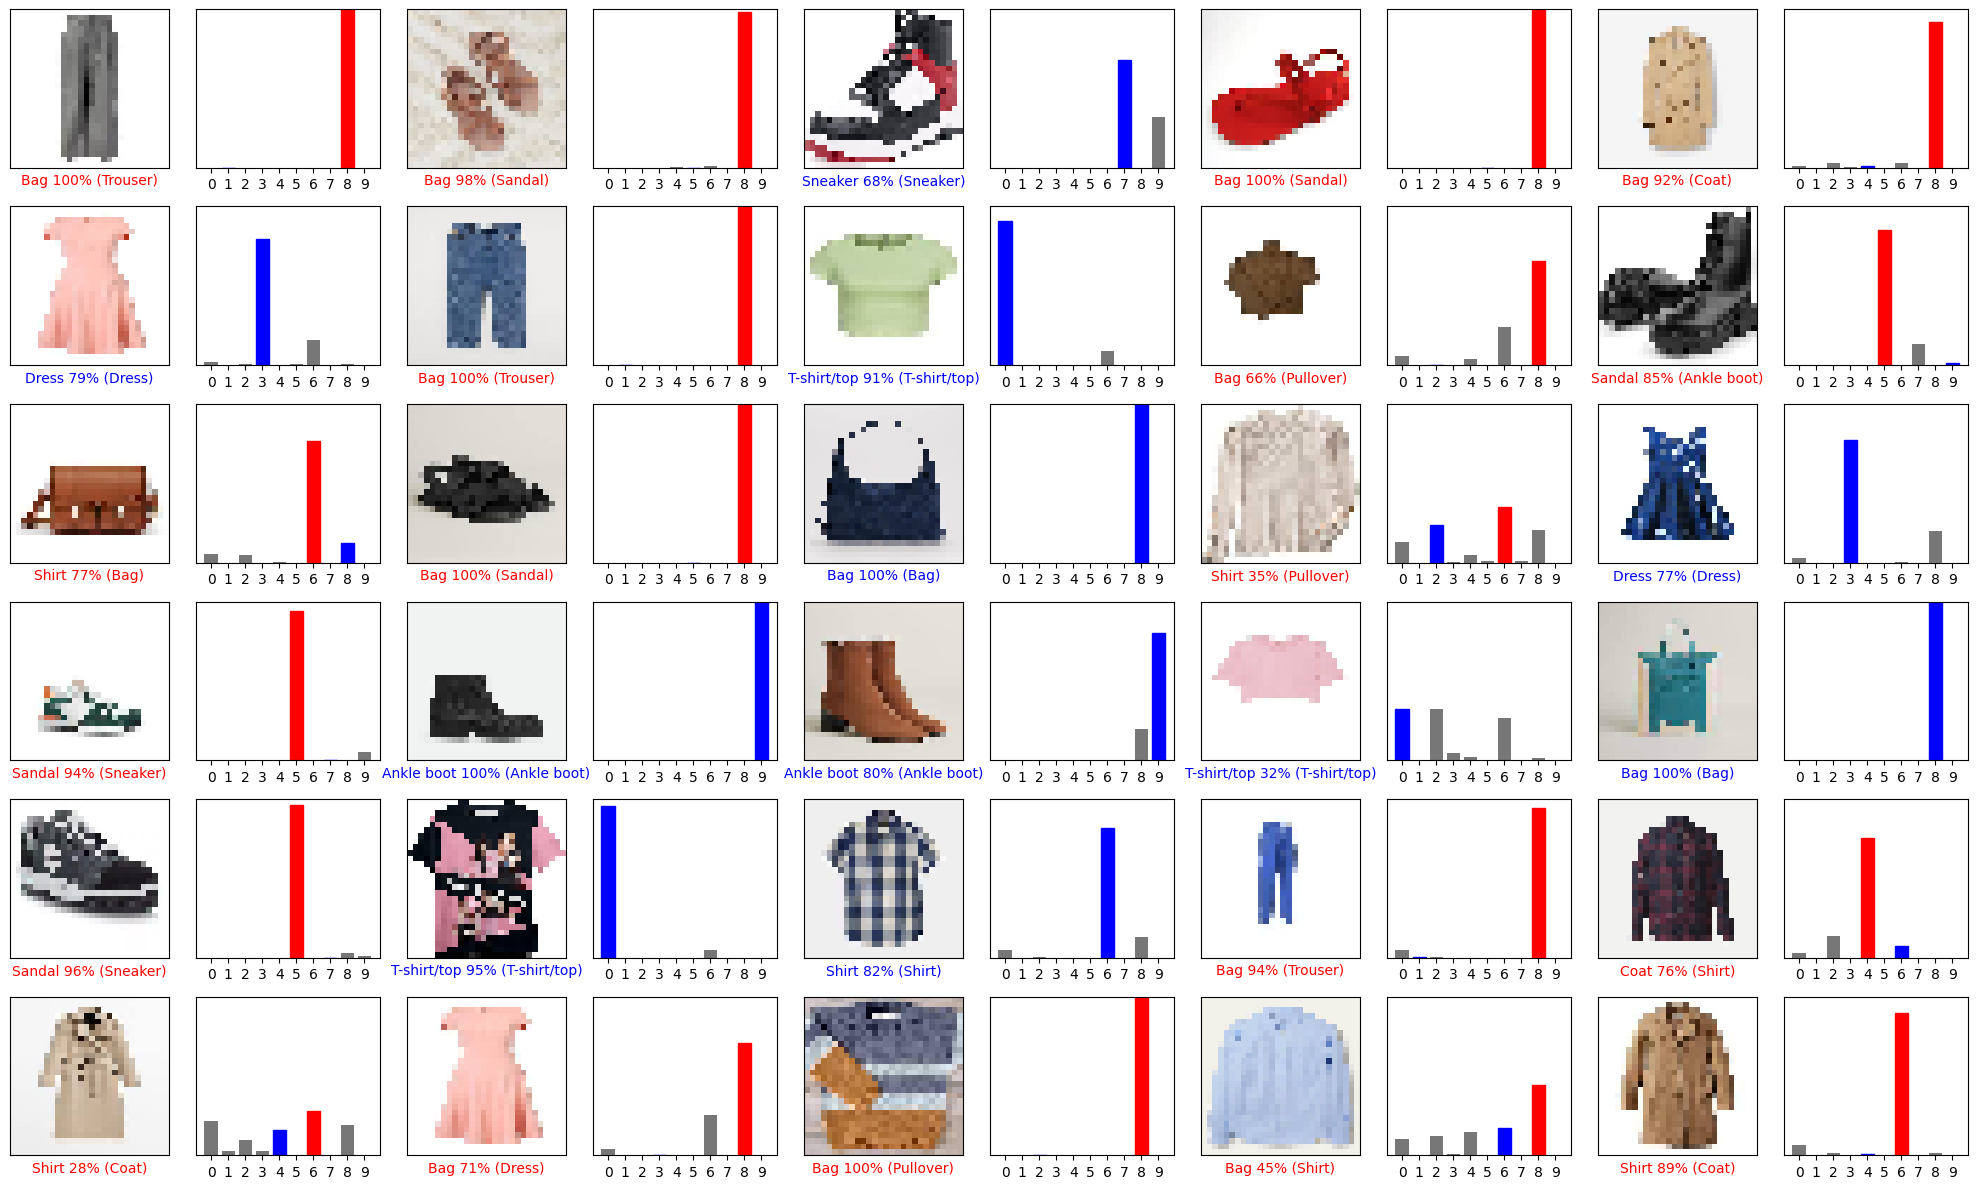

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_ed[i], class_indices_correc_ed, images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_ed[i], class_indices_correc_ed)
plt.tight_layout()
plt.show()

###**Imágenes editadas 2**

En este caso, se procedió a editarlas teniendo en cuenta lo siguiente:
- Proporción 1:1 de todas las imágenes.
- Fondo blanco.
- Se agrandó la prenda lo más posible sin deformarla.
- Calzado: en los casos que estaba el par completo, se dejó sólo uno. Se lo orientó hacia la izquierda.

####**Importación del nuevo dataset**

In [ ]:
data_dir_ed2 = '/content/drive/MyDrive/DiploDatos2023/Vision/ImagenesEd2'

datagen_ed2 = ImageDataGenerator(rescale=1.0/255.0)

batch_size = 32
image_size = (28, 28)
class_mode = 'categorical'

data_generator_ed2 = datagen.flow_from_directory(
    data_dir_ed2,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    seed=42
)



Found 30 images belonging to 10 classes.


In [ ]:
images_ed2, labels_ed2 = next(data_generator_ed2)


In [ ]:
# Convierte las imágenes a escala de grises
gray_ed2 = np.array([cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY) for image in images_ed2])

# Invierte los valores de los píxeles para obtener el negativo
inverted_gray_images_ed2 = 255 - gray_ed2

In [ ]:
inverted_gray_images_norm_ed2 = inverted_gray_images_ed2 / 255.0


#### **Muestra de clases y de imágenes del dataset**


In [ ]:
class_name_propio_ed2 = data_generator_ed2.class_indices

# Imprimir la lista de clases
print("Clases disponibles:")
for class_name, class_id in class_name_propio_ed2.items():
    print(f"{class_name}: {class_id}")

Clases disponibles:
Ankle boot: 0
Bag: 1
Coat: 2
Dress: 3
Pullover: 4
Sandal: 5
Shirt: 6
Sneakers: 7
T-shirt top: 8
Trousers: 9


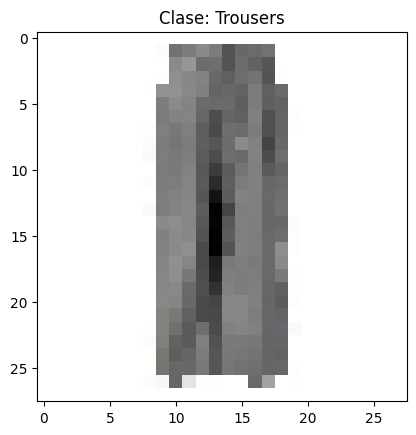

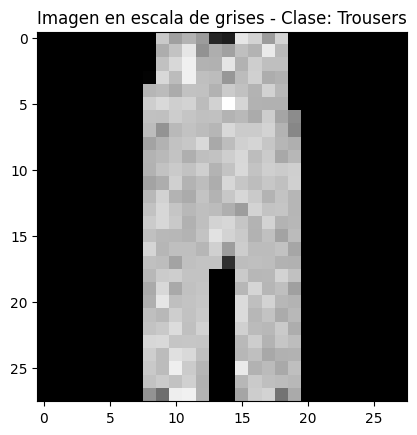

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Elije un índice de imagen en el lote (por ejemplo, 0 para la primera imagen)
image_index = 0
# Obtiene el índice de la clase correspondiente
class_index = np.argmax(labels[image_index])  # Índice de la clase

# Busca el nombre de la clase correspondiente
class_name_1_ed2 = list(data_generator_ed2.class_indices.keys())[class_index]

# Muestra la imagen y el nombre de la clase
plt.imshow(images[image_index])
plt.title(f'Clase: {class_name_1_ed2}')

# Muestra la imagen en escala de grises
grayscale_image = images_ed2[image_index]  # Supongo que rgb2gray es la función que convierte a escala de grises
plt.figure()
plt.imshow(inverted_gray_images_ed2[image_index], cmap='gray')
plt.title(f'Imagen en escala de grises - Clase: {class_name_1_ed2}')

plt.show()

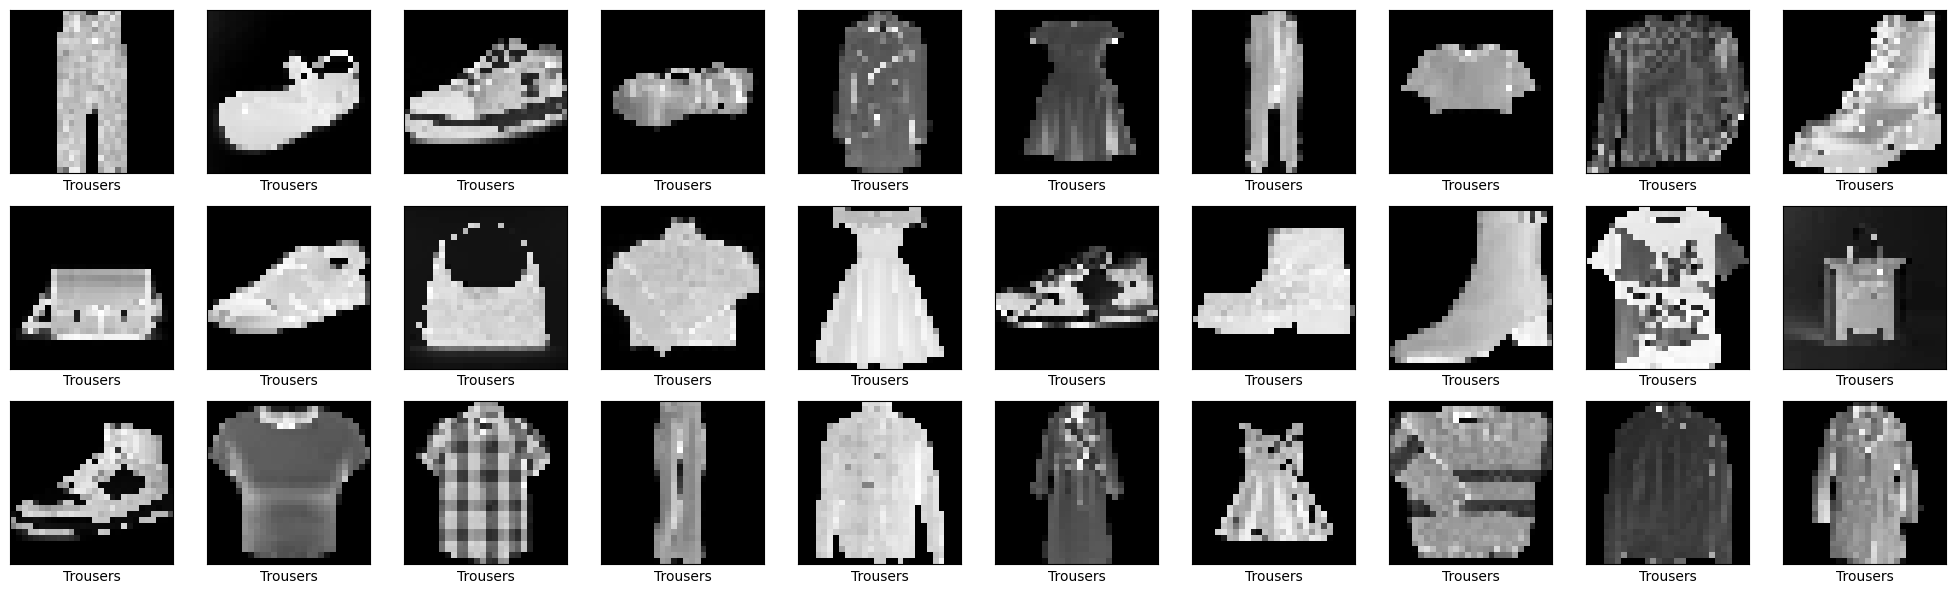

In [ ]:
## 1.2
plt.figure(figsize=(25,25))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(inverted_gray_images_ed2[i], cmap='gray')
    class_index = np.argmax(labels_ed2[i])
    class_name_1 = list(data_generator_ed2.class_indices.keys())[class_index]
    plt.xlabel(class_name_1_ed2)
plt.show()


#### **Predicción de etiquetas**

Tomando la ANN previamente entrenada, **predecir las etiquetas** de cada imagen del dataset y reportar los resultados de **accuracy** (y **opcionalmente** cualquier otra métrica que le resulte adecuada, como ser **precisión** y **recall**)

TIP: reutilice las celdas de código presentadas anteriormente

In [ ]:
## 1.3
predictions_ed2 = model.predict(inverted_gray_images_norm_ed2)

1/1 [==============================] - 0s 21ms/step


In [ ]:
for i in range(30):
    class_index = np.argmax(labels_ed2[i])
    class_name = list(data_generator_ed2.class_indices.keys())[class_index]
    pred_label_ed2 = np.argmax(predictions_ed2[i])
    pred_category_name_ed2 = class_dictionary[pred_label_ed2]
    print("Clase correcta:", class_name,
          "Predicha:", pred_label_ed2, f"({pred_category_name_ed2})")

Clase correcta: Trousers Predicha: 1 (Trouser)
Clase correcta: Sandal Predicha: 5 (Sandal)
Clase correcta: Sneakers Predicha: 7 (Sneaker)
Clase correcta: Sandal Predicha: 5 (Sandal)
Clase correcta: Coat Predicha: 4 (Coat)
Clase correcta: Dress Predicha: 3 (Dress)
Clase correcta: Trousers Predicha: 1 (Trouser)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: Pullover Predicha: 6 (Shirt)
Clase correcta: Ankle boot Predicha: 9 (Ankle boot)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Sandal Predicha: 7 (Sneaker)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Pullover Predicha: 8 (Bag)
Clase correcta: Dress Predicha: 3 (Dress)
Clase correcta: Sneakers Predicha: 7 (Sneaker)
Clase correcta: Ankle boot Predicha: 9 (Ankle boot)
Clase correcta: Ankle boot Predicha: 9 (Ankle boot)
Clase correcta: T-shirt top Predicha: 0 (T-shirt/top)
Clase correcta: Bag Predicha: 8 (Bag)
Clase correcta: Sneakers Predicha: 7 (Sneaker)
Clase correcta: T-shirt top Predicha: 0 (T

#####**Accuracy**

In [ ]:
class_indices_ed2 = np.argmax(labels_ed2, axis=1)
class_indices_ed2

array([9, 5, 7, 5, 2, 3, 9, 8, 4, 0, 1, 5, 1, 4, 3, 7, 0, 0, 8, 1, 7, 8,
       6, 9, 6, 2, 3, 4, 6, 2])

In [ ]:
#Corrección de los números de las etiquetas
sustituciones = {0: 9, 1: 8, 2: 4, 3: 3, 4: 2, 5: 5, 6: 6, 7: 7, 8: 0, 9: 1}

class_indices_correc_ed2 = []

# Recorre la lista y aplica las sustituciones en la nueva lista
for valor in class_indices_ed2:
    if valor in sustituciones:
        nuevo_valor = sustituciones[valor]
        class_indices_correc_ed2.append(nuevo_valor)
    else:
        class_indices_correc_ed2.append(valor)

print("Indices propios:", class_indices_ed2)
print("Indices corregidos:", class_indices_correc_ed2)

Indices propios: [9 5 7 5 2 3 9 8 4 0 1 5 1 4 3 7 0 0 8 1 7 8 6 9 6 2 3 4 6 2]
Indices corregidos: [1, 5, 7, 5, 4, 3, 1, 0, 2, 9, 8, 5, 8, 2, 3, 7, 9, 9, 0, 8, 7, 0, 6, 1, 6, 4, 3, 2, 6, 4]


In [ ]:
loss_ed2, accuracy_ed2 = model.evaluate(inverted_gray_images_norm_ed2, np.array(class_indices_correc_ed2))
print("Accuracy:", accuracy_ed2)

1/1 [==============================] - 0s 33ms/step - loss: 0.9105 - accuracy: 0.8000
Accuracy: 0.800000011920929


##### **Imágenes y sus predicciones**

En azul se muestran las predicciones correctas, mientras que, en rojo, las incorrectas.

In [ ]:
def plot_image__ed2(i, predictions_array_ed2, class_indices_correc_ed2, img):
  predictions_array_ed2, true_label, img = predictions_array_ed2, class_indices_correc_ed2[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  pred_label_ed2 = np.argmax(predictions_array_ed2)
  if pred_label_ed2 == class_indices_correc_ed2:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label_ed2],
                                100*np.max(predictions_array_ed2),
                                class_names[class_indices_correc_ed2]),
                                color=color)

def plot_value_array(i, predictions_array_ed2, class_indices_correc_ed2):
  predictions_array_ed2, class_indices_correc_ed2 = predictions_array_ed2, class_indices_correc_ed2[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array_ed2, color="#777777")
  plt.ylim([0, 1])
  pred_label_ed2 = np.argmax(predictions_array_ed2)

  thisplot[pred_label_ed2].set_color('red')
  thisplot[class_indices_correc_ed2].set_color('blue')

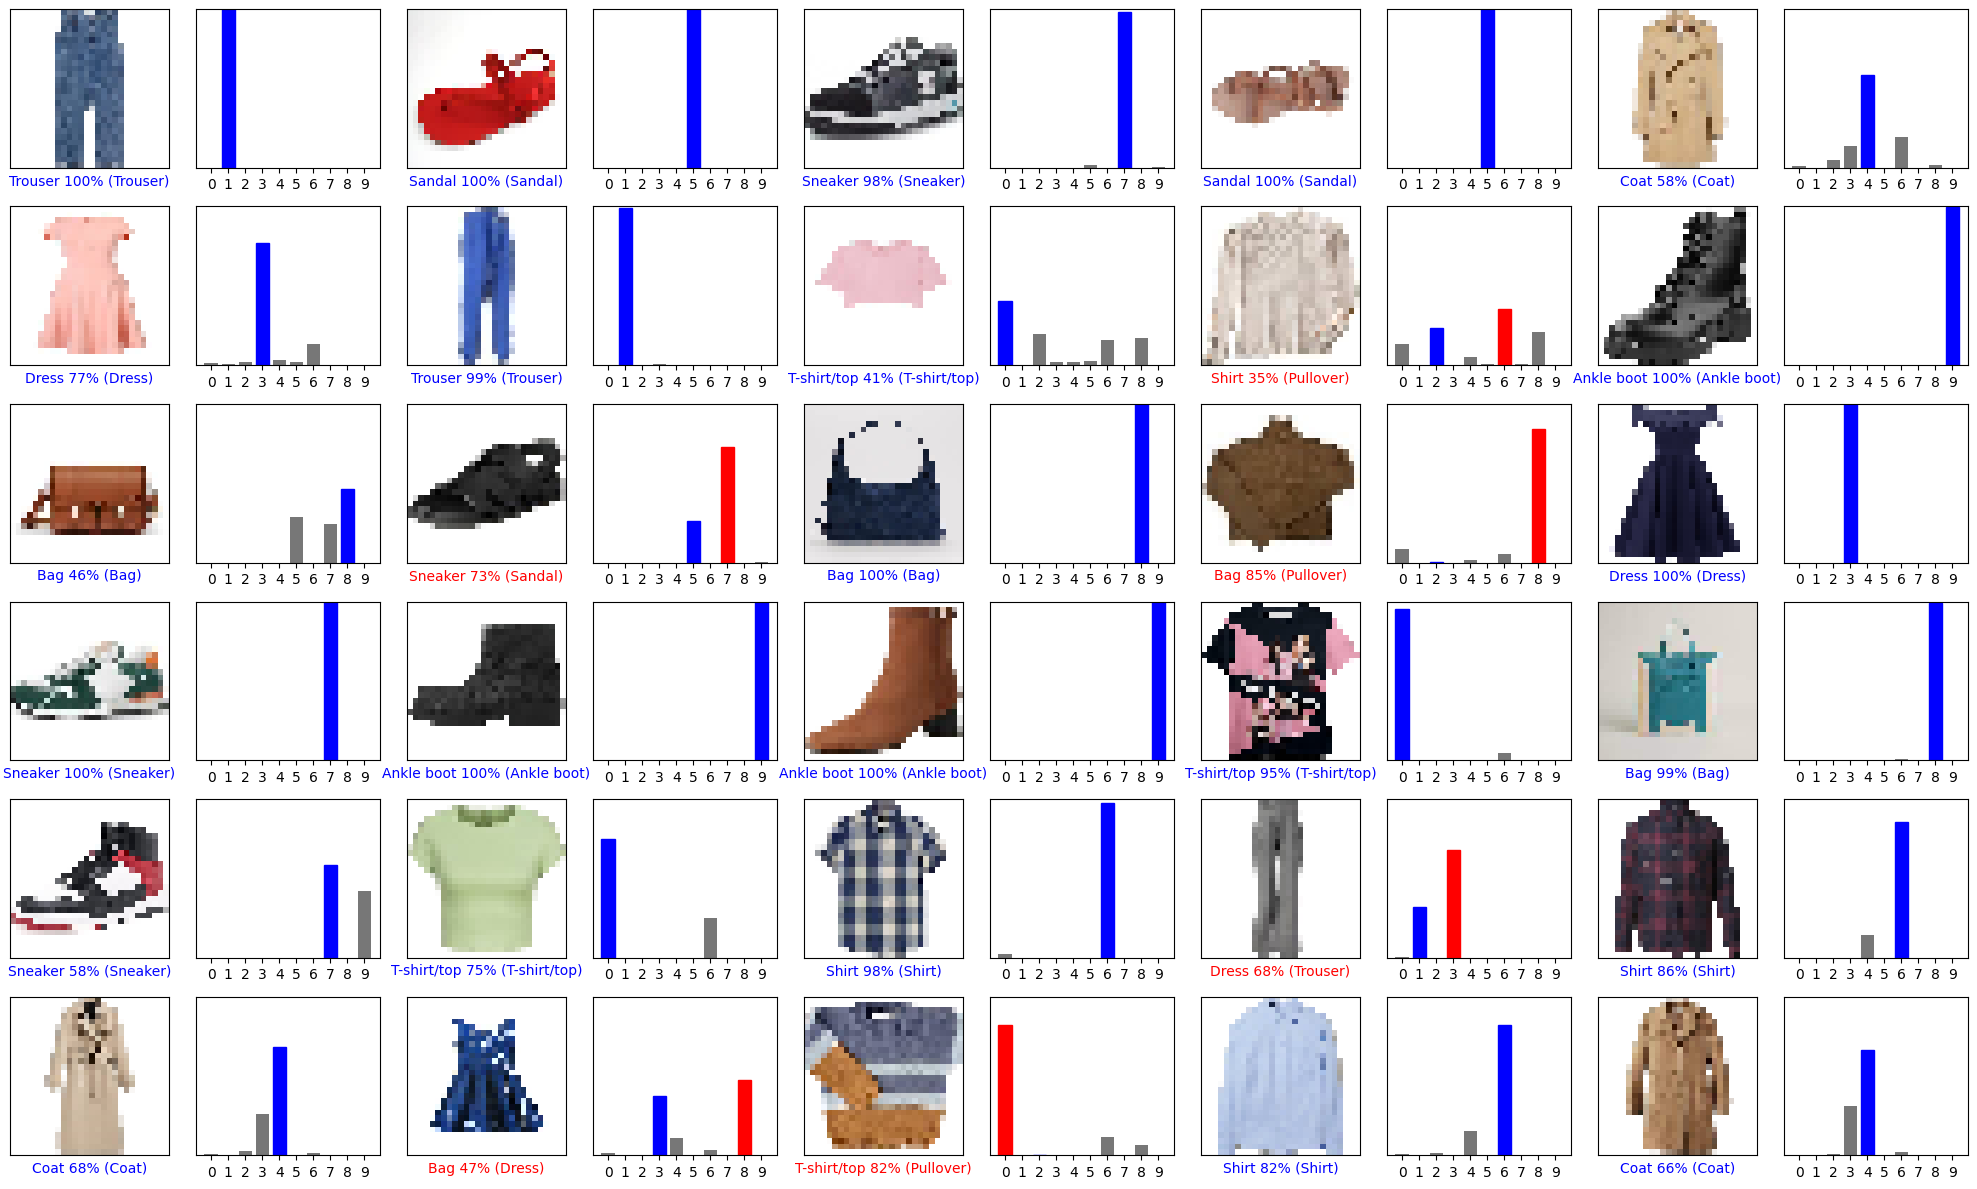

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_ed2[i], class_indices_correc_ed2, images_ed2)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_ed2[i], class_indices_correc_ed2)
plt.tight_layout()
plt.show()

## **EJERCICIO 1.2**: informe y conclusiones del ejercicio 1.1

#### 1. Elabore un breve resumen de lo realizado en el ejercicio 1.1
Elegimos 30 imágenes de vestimentas (3 de cada clase del dataset de mnist) desde Google y las utilizamos como un dataset nuevo de testeo para ver qué tan bien predice el modelo entrenado a partir de fashion mnist con imágenes elegidas al azar.

Al importarlas, las modificamos para darles el mismo formato que las imágenes de entrenamiento del modelo: 28x28, en escala de grises invertida y normalizadas. Realizamos la predicción y analizamos los resultados.

Repetimos el mismo proceso para estas mismas imágenes pero editadas manualmente. En un primer intento, sólo quitamos los bordes blancos de las imágenes y orientamos las sandalias/zapatillas hacia la izquierda.

En un segundo intento, para que se asemejen más a las imágenes del dataset fashion mnist: quitamos bordes blancos, proporción 1:1 para que se no se deforme al transformarla en 28x28, sólo una sandalia/zapatilla y orientada hacia la izquierda.

####2. Describa los principales resultados obtenidos

Los resultados obtenidos fueron bajos para las imágenes iniciales, obteniendo un 33% de aciertos. Observamos que, por ejemplo, la mayoría de los calzados no habían sido predichos de manera correcta y eran las imágenes que más se diferenciaban a las del dataset fashion mnist.

Durante la primera edición de las imágenes la métrica de accuracy tampoco fue buena, manteninedose en 33%. Al quitar todos los bordes, las proporciones para la mayoria de las prendas eran muy distintas a 1:1 y, por lo tanto, se deformaron mucho al transformarlas a 28x28 pixeles.

La segunda edición de las imagénes fue más detallada y, a partir de las mismas, se obtuvo una precisión del 80%. La única clase que clasificó completamente mal fue la de pullover,confundiendolos con distintas categorías, pero que, si uno ve las imágenes, pueden ser confusas. Por lo tanto, consideramos que este tipo de errores son difíles de evitar.

####3. Presente (si es posible) otros hallazgos realizados

Al principio no habíamos notado que las imágenes del dataset fashion mnist tenían una escala invertida de grises. Al aplicar sólo escala de grises, se obtenía que todo era un bolso. Estos resultados no se muestran a fines de simplificar lo mostrado y, porque fue un error de interpretar las imágenes del dataset. Resulta muy importante tener en cuenta las características de las imágenes con las que el modelo es entrenado para obtener resultados confiables.

Del mismo modo, fue muy interesante observar el cambio con las imágenes editadas pasando de un 33% a un 80% de exactitud. A pesar de ser imágenes elegidas al azar, si se las edita de manera que sus propiedades se asemejen a las de entrenamiento, es posible obtener buenas métricas precisión.


####4. Escriba las conclusiones finales

En conclusión, fue posible obtener una precisión del 80% en imágenes elegidas al azar desde Google. Para este resultado, la etapa de edición de las imágenes fue esencial para mejorar las predicciones, editando las imágenes de manera que se asemejen a las del dataset de entrenamiento.


## **EJERCICIO 1.3 (OPCIONAL)**: entrenar la red para resolver un nuevo problema

Realice una búsqueda en internet para relevar dataset similares al propuesto en este lab. Elija un dataset arbitario y con este vuelva a realizar el proceso de completo para entrenar una ANN como clasificador de imágenes sobre el nuevo dateset

TIP: dejo dos links para facilitar la búsqueda
- https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
- https://en.wikipedia.org/wiki/Caltech_101


In [ ]:
# EJERCICIO 1.3 (OPCIONAL)
# ...